LA data se debe estandarizar, esto es debido a la capacidad computacional que tenemos como limitante, es por eso que el escalar la data lleva a tener numeros dentro del rango entre 0 y 1 o media cero +- varianza, por lo que los valores a manejar es mucho mejor que trabajar con valores muy muy grandes.
Por lo que el preprocesamiento se incluye el escalamaniento.
Donde esto puede generar dispersión de dator muy grandes que llevaría a malas decisiones.

escalamiento con valores 0 y 1
se busca el max del vector y el min del vector
primero, sumar el valorabsoluto del valor minimo del vector
segundo se dividen todos los valores por el valor máximo
y ahora tenemos el vector escalado 

para estandarización, se usa sklearn

se llama standardscaler
se entrena el scaler 
luego se asocia a un nuevo vector y luego se muestra

para escalar:
- copiar la columna a escalar
- sumarle el valor minimo si hay valores negativos
- dividir la columna en el valor maximo
- para comprobar hay que buscar nuevamente el valor maximo y deberia dar 1

Regresión
se supone que los datos son lineales
se usa la ecuación de la recta
para esto se debe buscar la pendiente y el intercepto con el eje y
por lo que debe generalizar los datos
la entrada al regresor debe ser tipo columna no una fila

## Ejercicio con housing.csv
info
duplicados
columnas
70-30
70 de datos para entrenar y 30 para probar
x=area
y=price
estandarizar
y predecir

In [1]:
import pandas as pd
df = pd.read_csv('/Users/matiasinostrozacifuentes/Desktop/python_intro/DataScience_Unilever/Semana_5/Data/housing.csv')
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


Revisando los tipos de datos

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


No hay nulos
revisando los datos numericos

In [3]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


no se ven valores valores extraños
busqueda de duplicados

In [4]:
df.duplicated().sum()

0

No hay duplicados, por lo que la data esta bien.
se procede a estandarizar la data con sklearn

In [5]:
from sklearn.preprocessing import StandardScaler 

Media de los datos [4766729.24770642]
Varianza de los datos [3.49212501e+12]


(array([19., 42., 79., 89., 83., 54., 44., 42., 28., 19., 11., 14.,  8.,
         4.,  3.,  1.,  1.,  0.,  3.,  1.]),
 array([-1.61432675, -1.30529216, -0.99625756, -0.68722297, -0.37818837,
        -0.06915378,  0.23988081,  0.54891541,  0.85795   ,  1.16698459,
         1.47601919,  1.78505378,  2.09408838,  2.40312297,  2.71215756,
         3.02119216,  3.33022675,  3.63926134,  3.94829594,  4.25733053,
         4.56636513]),
 <BarContainer object of 20 artists>)

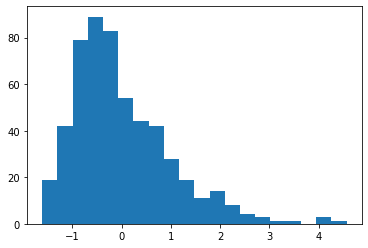

In [6]:
scaler = StandardScaler() # Creación de objeto StandardScaler
scaler.fit(df[['price']]) # Cálculo de parámetros de escalamiento
print('Media de los datos', scaler.mean_)
print('Varianza de los datos', scaler.var_)
price_scaled = scaler.transform(df[['price']]) # Transformación de los datos
import matplotlib.pyplot as plt
plt.hist(price_scaled, bins=20)

In [7]:
df['price_scaled']=price_scaled

In [8]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,price_scaled
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished,4.566365
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished,4.004484
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished,4.004484
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished,3.985755
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished,3.554979


Estandarizando el area

Media de los datos [5150.5412844]
Varianza de los datos [4700870.75104789]


(array([ 20.,  53., 105.,  94.,  46.,  70.,  56.,  32.,  23.,  16.,   8.,
          7.,   4.,   4.,   1.,   4.,   0.,   0.,   0.,   2.]),
 array([-1.61452974, -1.27899009, -0.94345045, -0.6079108 , -0.27237115,
         0.06316849,  0.39870814,  0.73424779,  1.06978743,  1.40532708,
         1.74086672,  2.07640637,  2.41194602,  2.74748566,  3.08302531,
         3.41856496,  3.7541046 ,  4.08964425,  4.4251839 ,  4.76072354,
         5.09626319]),
 <BarContainer object of 20 artists>)

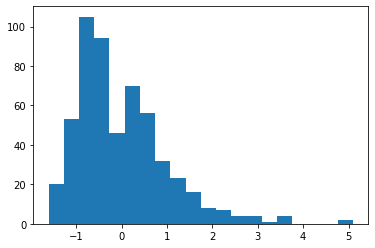

In [9]:
scalerA = StandardScaler() # Creación de objeto StandardScaler
scalerA.fit(df[['area']]) # Cálculo de parámetros de escalamiento
print('Media de los datos', scalerA.mean_)
print('Varianza de los datos', scalerA.var_)
area_scaled = scalerA.transform(df[['area']]) # Transformación de los datos
import matplotlib.pyplot as plt
plt.hist(area_scaled, bins=20)

<AxesSubplot:>

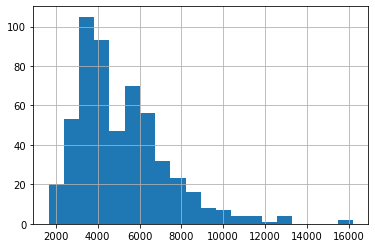

In [10]:
df['area'].hist(bins=20)

In [24]:
df['area_scaled']=area_scaled

Sacando el 70-30

In [25]:
len(df)*0.7

381.5

In [26]:
df_training=df.loc[0:381,:]

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [27]:
df_training.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,price_scaled,area_scaled
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished,4.566365,1.046726
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished,4.004484,1.757010
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished,4.004484,2.218232
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished,3.985755,1.083624
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished,3.554979,1.046726


In [28]:
x=df_training['area_scaled'].to_numpy()
x

array([ 1.04672629e+00,  1.75700953e+00,  2.21823241e+00,  1.08362412e+00,
        1.04672629e+00,  1.08362412e+00,  1.58174483e+00,  5.09626319e+00,
        1.36035785e+00,  2.76484076e-01,  3.71259454e+00,  3.91789797e-01,
        6.45462381e-01, -7.61267407e-01,  1.22199098e+00,  3.91789797e-01,
        6.68523525e-01,  1.54484700e+00, -2.53922238e-01,  5.85503407e-01,
       -3.83064644e-01,  9.24502225e-01,  1.33729670e+00, -2.72371153e-01,
        1.68321386e+00,  6.40850153e-01,  3.91789797e-01,  1.71780558e+00,
        1.29117442e+00,  1.61178356e-01,  1.07209355e+00,  8.53012678e-01,
       -1.24779831e-01,  3.73340881e-01,  7.79217017e-01,  8.53012678e-01,
        1.07532211e+00,  1.77545844e+00,  3.91789797e-01,  3.91789797e-01,
        6.45462381e-01,  5.57830034e-01,  6.13176780e-01,  3.91789797e-01,
        3.91789797e-01,  3.91789797e-01,  3.91789797e-01,  6.68523525e-01,
       -3.92289102e-01,  1.05595075e+00,  1.05595075e+00,  5.41687233e-01,
        3.91789797e-01, -

In [29]:
X = x.reshape(-1,1)
X

array([[ 1.04672629e+00],
       [ 1.75700953e+00],
       [ 2.21823241e+00],
       [ 1.08362412e+00],
       [ 1.04672629e+00],
       [ 1.08362412e+00],
       [ 1.58174483e+00],
       [ 5.09626319e+00],
       [ 1.36035785e+00],
       [ 2.76484076e-01],
       [ 3.71259454e+00],
       [ 3.91789797e-01],
       [ 6.45462381e-01],
       [-7.61267407e-01],
       [ 1.22199098e+00],
       [ 3.91789797e-01],
       [ 6.68523525e-01],
       [ 1.54484700e+00],
       [-2.53922238e-01],
       [ 5.85503407e-01],
       [-3.83064644e-01],
       [ 9.24502225e-01],
       [ 1.33729670e+00],
       [-2.72371153e-01],
       [ 1.68321386e+00],
       [ 6.40850153e-01],
       [ 3.91789797e-01],
       [ 1.71780558e+00],
       [ 1.29117442e+00],
       [ 1.61178356e-01],
       [ 1.07209355e+00],
       [ 8.53012678e-01],
       [-1.24779831e-01],
       [ 3.73340881e-01],
       [ 7.79217017e-01],
       [ 8.53012678e-01],
       [ 1.07532211e+00],
       [ 1.77545844e+00],
       [ 3.9

In [30]:
y_trainig=df_training['price_scaled'].to_numpy()

In [31]:
lin_reg = LinearRegression() # Creación de objeto Regresor lineal Scikit-Learn
X = x.reshape(-1,1) # Generación de vector columna
lin_reg.fit(X,y_trainig) # Cálculo de parámetros \theta_0, \theta_1... etc
print('El bias calculado es', lin_reg.intercept_)
print('La pendiente calculada es: ', lin_reg.coef_)

El bias calculado es 0.31499550785196345
La pendiente calculada es:  [0.40553515]


In [36]:
df_test=df.loc[382:,:]

In [39]:
X_new=df_test['area_scaled'].to_numpy().reshape(-1,1)

In [40]:
lin_reg.predict(X_new)

array([-0.05918992,  0.19331691,  0.19331691,  0.03246071,  0.07173955,
        0.14468596,  0.03433113,  0.21202112, -0.24903764, -0.08051271,
        0.09792544,  0.74022798,  0.00253397,  0.02497903,  0.03246071,
        0.45517583, -0.06480118,  0.72638686,  0.00851932,  1.12852736,
        0.45143499,  1.77270032,  0.26813374, -0.0760237 ,  0.34669142,
       -0.24716722,  0.09979586, -0.05264344,  0.07173955, -0.24716722,
       -0.16019264, -0.28364042,  0.10727754,  0.2466239 , -0.00307729,
        0.03246071,  0.00627482,  0.27935627,  0.12224091,  0.24007743,
        0.04742408,  0.05303534, -0.06854202, -0.05264344, -0.14335886,
       -0.24716722,  0.10727754,  0.24475348, -0.18076727, -0.05357865,
        0.48510257,  0.00253397,  0.06089111,  0.10727754, -0.24716722,
        0.45143499,  0.19331691,  0.08670291,  0.03246071,  0.16900143,
       -0.14635153,  0.15964933, -0.06480118, -0.00307729,  0.09717727,
        0.00627482,  0.11756486, -0.33975305, -0.00307729,  0.61

In [41]:
import matplotlib.pyplot as plt

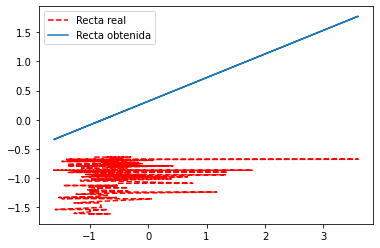

In [42]:
y_new=df_test['price_scaled'].to_numpy()
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(X_new, y_new, '--r')
ax.plot(X_new, lin_reg.predict(X_new))
ax.legend(['Recta real','Recta obtenida'])
plt.show()


In [43]:
y_pred=lin_reg.predict(X_new)
r2_score(y_new, y_pred)

-17.7577514251343

Ahora se realizará un regresor a la prueba con la columna que deseemos